### Understand the Dataset

In [1]:
import pandas as pd
import numpy as np

import os
import shutil

import matplotlib.pyplot as plt
from PIL import Image, ImageFile

In [2]:
# Read the csv file for Art Styles and File names
df = pd.read_csv('all_data_info.csv')

df.head(10)

,artist,date,genre,pixelsx,pixelsy,size_bytes,source,style,title,artist_group,in_train,new_filename
0,Barnett Newman,1955.0,abstract,15530.0,6911.0,9201912.0,wikiart,Color Field Painting,Uriel,train_only,True,102257.jpg
1,Barnett Newman,1950.0,abstract,14559.0,6866.0,8867532.0,wikiart,Color Field Painting,Vir Heroicus Sublimis,train_only,True,75232.jpg
2,kiri nichol,2013.0,NaN,9003.0,9004.0,1756681.0,NaN,Neoplasticism,NaN,test_only,False,32145.jpg
3,kiri nichol,2013.0,NaN,9003.0,9004.0,1942046.0,NaN,Neoplasticism,NaN,test_only,False,20304.jpg
4,kiri nichol,2013.0,NaN,9003.0,9004.0,1526212.0,NaN,Neoplasticism,NaN,test_only,False,836.jpg
5,Tosa Mitsuoki,NaN,mythological painting,25528.0,3000.0,10496349.0,wikiart,Yamato-e,Night March of a Hundred Demons (left half),train_only,True,29855.jpg
6,Barnett Newman,NaN,abstract,7345.0,8640.0,6383948.0,wikiart,Color Field Painting,"Who’s Afraid of Red, Yellow and Blue II",train_only,True,62252.jpg
7,Hiroshige,1838,bird-and-flower painting,6483.0,9276.0,12762418.0,wikiart,Ukiyo-e,Small Bird on a Branch of Kaidozakura,train_and_test,False,49823.jpg
8,Barnett Newman,1963.0,abstract,6049.0,8206.0,1135960.0,wikiart,Color Field Painting,Black Fire I,train_only,True,63861.jpg
9,Franz Richard Unterberger,NaN,cityscape,6238.0,7352.0,7896792.0,wikiart,Romanticism,Procession in Naples,train_and_test,False,84512.jpg


In [3]:
print(f"Number of total samples: {df.shape[0]}\nNumber of features: {df.shape[1]}")

Number of total samples: 103250
Number of features: 12


In [4]:
# The genres

unique_genres = df['genre'].unique()
unique_genres

array(['abstract', nan, 'mythological painting',
       'bird-and-flower painting', 'cityscape', 'landscape',
       'religious painting', 'marina', 'genre painting',
       'history painting', 'still life', 'animal painting',
       'self-portrait', 'illustration', 'allegorical painting',
       'literary painting', 'flower painting', 'portrait', 'figurative',
       'interior', 'nude painting (nu)', 'poster', 'symbolic painting',
       'advertisement', 'design', 'panorama', 'sketch and study',
       'cloudscape', 'quadratura', 'caricature', 'capriccio', 'veduta',
       'battle painting', 'calligraphy', 'vanitas', 'pastorale',
       'wildlife painting', 'miniature', 'yakusha-e', 'tessellation',
       'shan shui', 'bijinga', 'urushi-e'], dtype=object)

In [5]:
# The styles

unique_styles = df['style'].unique()
unique_styles

array(['Color Field Painting', 'Neoplasticism', 'Yamato-e', 'Ukiyo-e',
       'Romanticism', 'Surrealism', 'Northern Renaissance', 'Cloisonnism',
       'Abstract Art', 'Realism', 'Biedermeier', 'Symbolism', 'Baroque',
       'Tenebrism', 'Cubism', 'Mannerism (Late Renaissance)',
       'Pointillism', 'Rococo', 'High Renaissance', 'Fauvism', nan,
       'Early Renaissance', 'Magic Realism', 'Classicism',
       'Post-Impressionism', 'Art Nouveau (Modern)', 'Expressionism',
       'Impressionism', 'Japonism', 'Neoclassicism',
       'Contemporary Realism', 'Suprematism', 'Naïve Art (Primitivism)',
       'Tachisme', 'Ink and wash painting', 'Orphism', 'Luminism',
       'Neo-Rococo', 'Orientalism', 'Academicism', 'Tonalism', 'Op Art',
       'Neo-Romanticism', 'Constructivism', 'Dada', 'Neo-Expressionism',
       'Abstract Expressionism', 'Proto Renaissance',
       'Lyrical Abstraction', 'Byzantine', 'Muralism', 'Art Informel',
       'Analytical\xa0Realism', 'Concretism', 'Art Brut', 

In [6]:
# Styles to keep are: Abstract Art, Realism, Cubism, Expressionism, Impressionism

styles_to_keep = [
    'Abstract Art', 'Realism', 'Cubism',
    'Expressionism', 'Impressionism'
]

filtered_df = df[df['style'].isin(styles_to_keep) & df['in_train']]

filtered_df.head(10)

,artist,date,genre,pixelsx,pixelsy,size_bytes,source,style,title,artist_group,in_train,new_filename
24,Julius LeBlanc Stewart,1896,genre painting,6980.0,4724.0,2484194.0,wikiart,Realism,Yachting in the Mediterranean,train_only,True,28908.jpg
36,Lyonel Feininger,1936.0,cityscape,4630.0,5892.0,7583680.0,wikiart,Cubism,Gelmeroda XIII,train_only,True,71435.jpg
40,Lyonel Feininger,1924.0,cityscape,4550.0,5920.0,7383862.0,wikiart,Cubism,Barfuesserkirche I,train_only,True,63416.jpg
43,Lyonel Feininger,1925.0,cityscape,4550.0,5892.0,7484741.0,wikiart,Cubism,Torturm II,train_only,True,4147.jpg
46,Lyonel Feininger,1926.0,cityscape,4472.0,5894.0,7382419.0,wikiart,Cubism,Gelmeroda IX,train_only,True,19385.jpg
78,Thomas Eakins,NaN,nude painting (nu),3648.0,6264.0,9096636.0,wikipedia,Realism,Nude Woman Standing,train_and_test,True,633.jpg
90,August Macke,c.1910,genre painting,3846.0,5592.0,11625509.0,wikiart,Expressionism,Sailing boat on the Tegernsee,train_and_test,True,31234.jpg
110,William-Adolphe Bouguereau,1892,genre painting,3701.0,5490.0,2026238.0,wikiart,Realism,Leveil Heart,train_and_test,True,19834.jpg
114,Thomas Eakins,1880,portrait,3949.0,5092.0,8553121.0,wikiart,Realism,General George Cadwalader,train_and_test,True,45276.jpg
118,Ferdinand Hodler,1882,genre painting,4992.0,3966.0,11231877.0,wikiart,Realism,Devotion,train_and_test,True,80938.jpg


In [7]:
unique_styles = filtered_df['style'].unique()
unique_styles

array(['Realism', 'Cubism', 'Expressionism', 'Impressionism',
       'Abstract Art'], dtype=object)

In [8]:
print(f"Number of style samples: {filtered_df.shape[0]}\nNumber of features: {filtered_df.shape[1]}")

Number of style samples: 23732
Number of features: 12


In [9]:
filtered_df['style'].value_counts()

Impressionism    8220
Realism          8112
Expressionism    5325
Cubism           1316
Abstract Art      759
Name: style, dtype: int64

In [10]:
np.random.seed(0)

# Filter out the styles to be reduced
styles_to_reduce = ['Impressionism', 'Realism', 'Expressionism', 'Cubism']

new_df = filtered_df.copy()

for style in styles_to_reduce:
    style_rows = new_df[new_df['style'] == style]
    reduced_style_rows = style_rows.sample(n=1300, random_state=0)
    new_df = new_df[new_df['style'] != style]
    new_df = pd.concat([new_df, reduced_style_rows])

updated_style_counts_new_df = new_df['style'].value_counts()

updated_style_counts_new_df


Impressionism    1300
Realism          1300
Expressionism    1300
Cubism           1300
Abstract Art      759
Name: style, dtype: int64

In [11]:
new_df.head(10)

,artist,date,genre,pixelsx,pixelsy,size_bytes,source,style,title,artist_group,in_train,new_filename
1560,Auguste Herbin,1927.0,abstract,2458.0,3232.0,911582.0,wikiart,Abstract Art,Composition,train_and_test,True,51851.jpg
2907,David Kakabadze,1924,abstract,2165.0,2819.0,2075897.0,wikiart,Abstract Art,Constructive-decorative composition,train_only,True,97906.jpg
3571,Paul Klee,1924,abstract,2102.0,2639.0,2603386.0,wikiart,Abstract Art,Structural II,train_and_test,True,45133.jpg
5316,David Kakabadze,1924,abstract,2442.0,1891.0,1202238.0,wikiart,Abstract Art,composition,train_only,True,79821.jpg
5386,Theo van Doesburg,1916,still life,2278.0,2008.0,1726050.0,wikiart,Abstract Art,Still Life (Composition V),train_and_test,True,59690.jpg
5806,David Kakabadze,1927,abstract,2275.0,1905.0,1609481.0,wikiart,Abstract Art,Abstraction,train_only,True,35840.jpg
5906,David Kakabadze,1927,abstract,2386.0,1794.0,1922314.0,wikiart,Abstract Art,Abstraction,train_only,True,3116.jpg
5922,David Kakabadze,1926,abstract,2266.0,1886.0,1772881.0,wikiart,Abstract Art,Abstraction,train_only,True,38778.jpg
5935,David Kakabadze,1924,abstract,1815.0,2351.0,1041183.0,wikiart,Abstract Art,Constructive-decorative composition,train_only,True,32392.jpg
6824,David Kakabadze,1926,abstract,1639.0,2346.0,1225469.0,wikiart,Abstract Art,Composition,train_only,True,12698.jpg


In [12]:
print(f"Number of samples in reduced: {new_df.shape[0]}\nNumber of features: {new_df.shape[1]}")

Number of samples in reduced: 5959
Number of features: 12


### Get Related Images and Create X & y

In [13]:
main_folder_path = "C:/Users/Kayra/Downloads/train/train"

style_folders = {
    'Abstract Art': 'C:/Users/Kayra/Desktop/EHB/ANN/PROJECT/Art_Images/Abstract Art',
    'Cubism': 'C:/Users/Kayra/Desktop/EHB/ANN/PROJECT/Art_Images/Cubism',
    'Expressionism': 'C:/Users/Kayra/Desktop/EHB/ANN/PROJECT/Art_Images/Expressionism',
    'Impressionism': 'C:/Users/Kayra/Desktop/EHB/ANN/PROJECT/Art_Images/Impressionism',
    'Realism': 'C:/Users/Kayra/Desktop/EHB/ANN/PROJECT/Art_Images/Realism'
}

In [15]:
for index, row in new_df.iterrows():
    
    # Get the file name and the style
    file_name = row['new_filename']
    style = row['style']

    source_path = os.path.join(main_folder_path, file_name)
    destination_path = os.path.join(style_folders[style], file_name)

    # Copy the file to the respective folder
    shutil.copy(source_path, destination_path)

In [14]:
# Function to count files in a folder
def count_files_in_folder(folder_path):
    return len([name for name in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, name))])

# Compare the actual file count with the expected count from new_df
for style, folder_path in style_folders.items():
    actual_count = count_files_in_folder(folder_path)
    expected_count = new_df[new_df['style'] == style].shape[0]
    print(f"Style: {style}, Expected Count: {expected_count}, Actual Count: {actual_count}")

Style: Abstract Art, Expected Count: 759, Actual Count: 759
Style: Cubism, Expected Count: 1300, Actual Count: 1300
Style: Expressionism, Expected Count: 1300, Actual Count: 1300
Style: Impressionism, Expected Count: 1300, Actual Count: 1300
Style: Realism, Expected Count: 1300, Actual Count: 1300


In [15]:
X = []
y = []

In [16]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Mapping of styles to labels
style_labels = {
    'Abstract Art': 0,
    'Cubism': 1,
    'Expressionism': 2,
    'Impressionism': 3,
    'Realism': 4
}

def resize_image(input_dir, output_dir, output_size):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for filename in os.listdir(input_dir):
        # Check if the file is an image
        if filename.lower().endswith((".jpg", ".jpeg", ".png")):
            try:
                with Image.open(os.path.join(input_dir, filename)) as img:
                    img = img.convert('RGB')
                    img = img.resize(output_size)
                    img_array = np.asarray(img) / 255
                    if img_array.shape == (output_size[0], output_size[1], 3):
                        X.append(img_array)

                        # Determine the label from the input directory
                        label = style_labels.get(os.path.basename(input_dir), -1)
                        y.append(label)

                        img.save(os.path.join(output_dir, filename))

                    else:
                        print(f"Image {filename} has an unexpected shape: {img_array.shape}")

            except IOError as e:
                print(f"Error processing file {filename}: {e}")
                continue

    print("Done resizing images from", input_dir)

In [17]:
resize_image(style_folders["Abstract Art"], style_folders["Abstract Art"]+"/Resized", (224, 224))
resize_image(style_folders["Cubism"], style_folders["Cubism"]+"/Resized", (224, 224))
resize_image(style_folders["Expressionism"], style_folders["Expressionism"]+"/Resized", (224, 224))
resize_image(style_folders["Impressionism"], style_folders["Impressionism"]+"/Resized", (224, 224))
resize_image(style_folders["Realism"], style_folders["Realism"]+"/Resized", (224, 224))

Done resizing images from C:/Users/Kayra/Desktop/EHB/ANN/PROJECT/Art_Images/Abstract Art
Done resizing images from C:/Users/Kayra/Desktop/EHB/ANN/PROJECT/Art_Images/Cubism
Done resizing images from C:/Users/Kayra/Desktop/EHB/ANN/PROJECT/Art_Images/Expressionism
Done resizing images from C:/Users/Kayra/Desktop/EHB/ANN/PROJECT/Art_Images/Impressionism
Done resizing images from C:/Users/Kayra/Desktop/EHB/ANN/PROJECT/Art_Images/Realism


In [18]:
X = np.array(X)

X.shape

(5959, 224, 224, 3)

In [19]:
y = np.array(y)

y.shape

(5959,)

Text(0.5, 1.0, 'Realism')

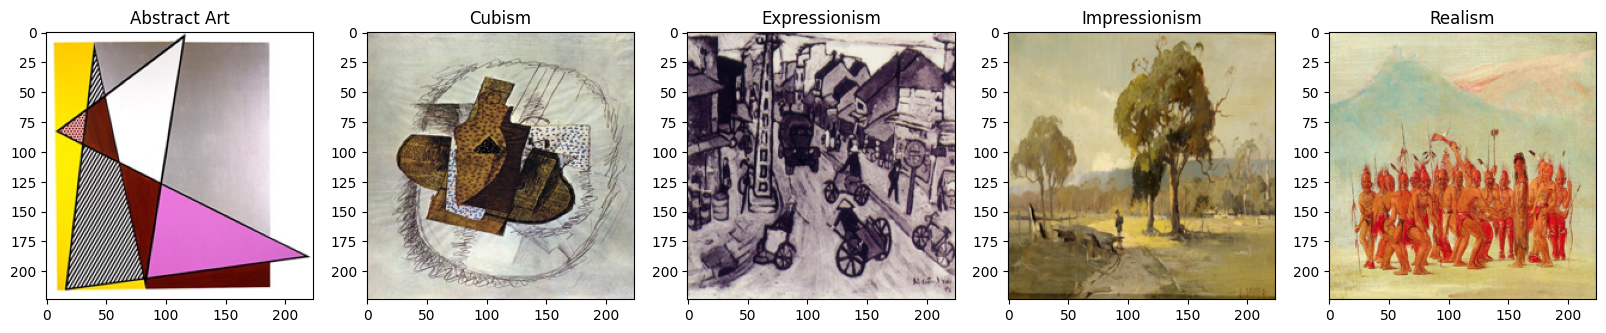

In [21]:
reverse_style_labels = {v: k for k, v in style_labels.items()}

fig, axs = plt.subplots(1, 5, figsize=(20, 10))

axs[0].imshow(X[0])
axs[0].set_title(reverse_style_labels[y[0]])

axs[1].imshow(X[801])
axs[1].set_title(reverse_style_labels[y[801]])

axs[2].imshow(X[2060])
axs[2].set_title(reverse_style_labels[y[2060]])

axs[3].imshow(X[3360])
axs[3].set_title(reverse_style_labels[y[3360]])

axs[4].imshow(X[4660])
axs[4].set_title(reverse_style_labels[y[4660]])


In [22]:
# Export the datasets to numpy files

np.save("X.npy", X)
np.save("y.npy", y)